In [57]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [58]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg

In [59]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
BU_FOLDER = os.path.join(os.path.dirname(CURRENT_FOLDER), "cluster_backup", "gradu_cluster_backup_05042023")

In [60]:
linear_regression_results = pd.read_csv(os.path.join(BU_FOLDER, "napsu_linear_regression_test_timer.csv"))

In [61]:
# Because header is repeated multiple times, remove the duplicate headers
linear_regression_results = linear_regression_results[linear_regression_results['start'] != 'start']

In [65]:
data_type_dict = {
    'experiment_id': str,
    'start': float,
    'stop': float,
    'timedelta': float,
    'task': str,
    'dataset_name': str,
    'query': object,
    'epsilon': float,
    'delta': float,
    'MCMC_algo': str,
    'laplace_approximation': bool,
    'laplace_approximation_algorithm': str, 
    'query_str': str,
    'query_list': object,
    'missing_query': str,
    'discretization': bool,
    'n_canonical_queries': float,
    'junction_tree_width': float,
    'suff_stat_dim': object,
}

linear_regression_results = linear_regression_results.astype(data_type_dict)

In [33]:
linear_regression_results

,experiment_id,start,stop,timedelta,task,dataset_name,query,epsilon,delta,MCMC_algo,laplace_approximation,laplace_approximation_algorithm,query_str,query_list,missing_query,discretization,n_canonical_queries,junction_tree_width,suff_stat_dim
0,V4ULPDFD,1.383221e+06,1.383263e+06,42.395334,Main run,dummy_5x2,[],0.3,1.000000e-08,NUTS,True,torch_LBFGS,nan,NaN,nan,True,NaN,NaN,NaN
1,V4ULPDFD,1.383221e+06,1.383226e+06,5.409640,Query selection,dummy_5x2,NaN,0.3,1.000000e-08,NUTS,True,nan,empty,[],nan,True,NaN,NaN,NaN
2,V4ULPDFD,1.383226e+06,1.383226e+06,0.000153,Calculating full marginal query,dummy_5x2,NaN,0.3,1.000000e-08,NUTS,True,nan,empty,[],nan,True,NaN,NaN,NaN
3,V4ULPDFD,1.383226e+06,1.383226e+06,0.010328,Calculating canonical query set,dummy_5x2,NaN,0.3,1.000000e-08,NUTS,True,nan,empty,[],nan,True,NaN,NaN,NaN
4,V4ULPDFD,1.383227e+06,1.383229e+06,2.670777,Laplace approximation,dummy_5x2,NaN,0.3,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,3.0,"(9,)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,WEKZTDK3,1.384519e+06,1.384524e+06,4.879732,Query selection,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,True,nan,empty,[],nan,True,NaN,NaN,NaN
205,WEKZTDK3,1.384524e+06,1.384524e+06,0.000431,Calculating full marginal query,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,True,nan,empty,[],nan,True,NaN,NaN,NaN
206,WEKZTDK3,1.384524e+06,1.384524e+06,0.013943,Calculating canonical query set,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,True,nan,empty,[],nan,True,NaN,NaN,NaN
207,WEKZTDK3,1.384524e+06,1.384560e+06,35.866957,Laplace approximation,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,174.0,3.0,"(174,)"


In [29]:
MCMC_rows = linear_regression_results[linear_regression_results['task'] == 'MCMC']

In [39]:
MCMC_rows.sort_values(["dataset_name", "epsilon"])

,experiment_id,start,stop,timedelta,task,dataset_name,query,epsilon,delta,MCMC_algo,laplace_approximation,laplace_approximation_algorithm,query_str,query_list,missing_query,discretization,n_canonical_queries,junction_tree_width,suff_stat_dim
26,VUZSN0ID,1.383276e+06,1.383302e+06,26.128632,MCMC,dummy_5x2,NaN,0.1,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,3.0,"(9,)"
5,V4ULPDFD,1.383229e+06,1.383261e+06,31.263832,MCMC,dummy_5x2,NaN,0.3,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,3.0,"(9,)"
19,JEFBHZF0,1.383266e+06,1.383295e+06,29.504196,MCMC,dummy_5x2,NaN,1.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,2.0,"(9,)"
12,ZQM99RBQ,1.383268e+06,1.383294e+06,25.969453,MCMC,dummy_5x2,NaN,3.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,1.0,"(9,)"
82,84TXZY13,1.384473e+06,1.384494e+06,21.272929,MCMC,dummy_5x2,NaN,8.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,3.0,"(9,)"
47,AXODXMM1,1.383276e+06,1.383422e+06,146.071826,MCMC,dummy_5x3,NaN,0.1,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,26.0,3.0,"(26,)"
89,IXZH5WSU,1.384494e+06,1.384578e+06,83.498679,MCMC,dummy_5x3,NaN,0.3,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,26.0,1.0,"(26,)"
40,GVTRS6VY,1.383277e+06,1.383338e+06,61.182982,MCMC,dummy_5x3,NaN,1.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,26.0,2.0,"(26,)"
96,PBIL7NKF,1.384497e+06,1.384591e+06,94.447292,MCMC,dummy_5x3,NaN,3.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,26.0,3.0,"(26,)"
33,JALY4KLB,1.383258e+06,1.383322e+06,64.414908,MCMC,dummy_5x3,NaN,8.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,26.0,3.0,"(26,)"


[]

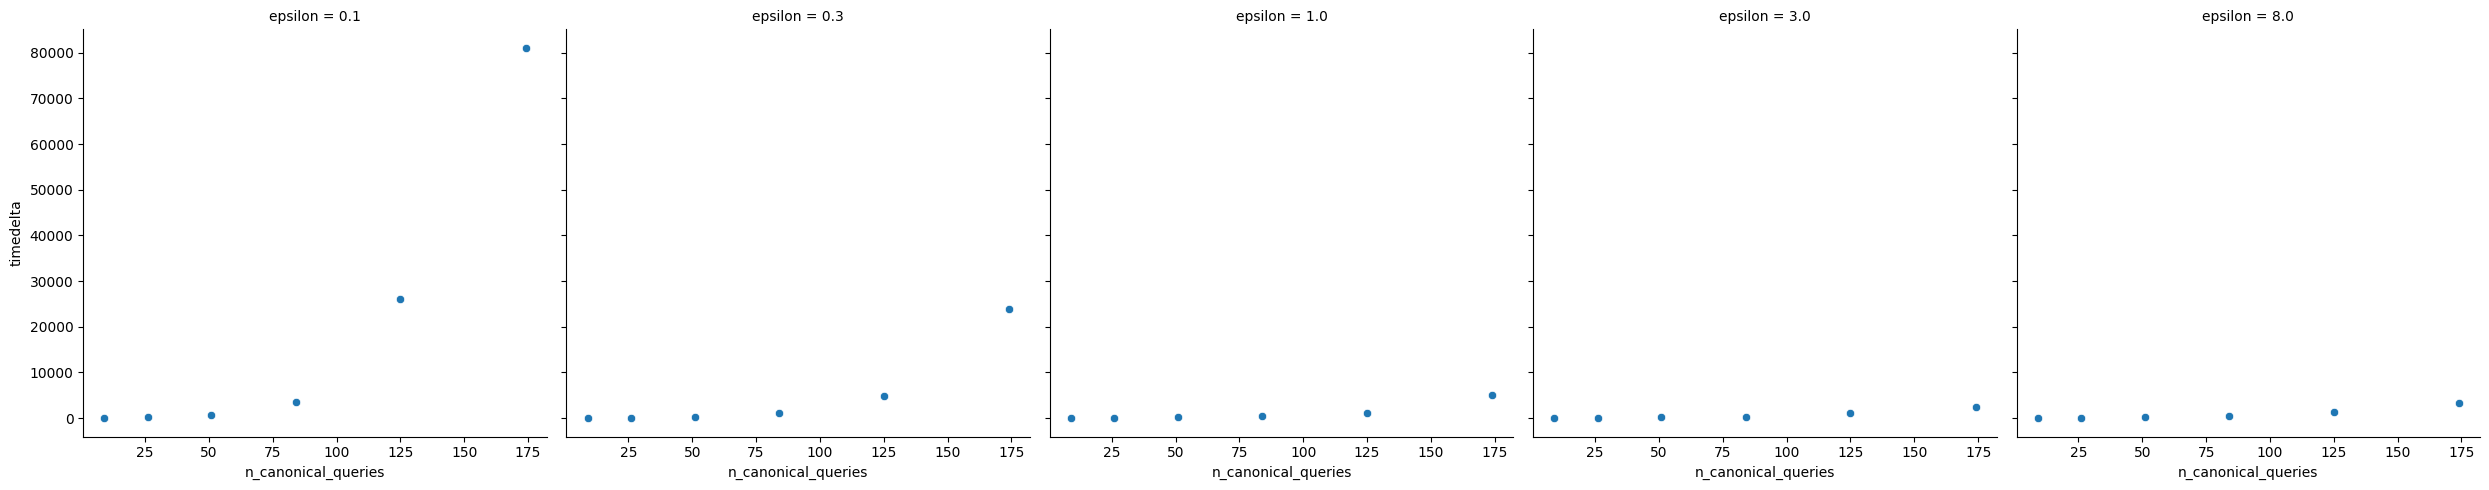

In [36]:
sns.relplot(
    data=MCMC_rows,
    x="n_canonical_queries", y="timedelta", col="epsilon",
)
plt.plot()

[]

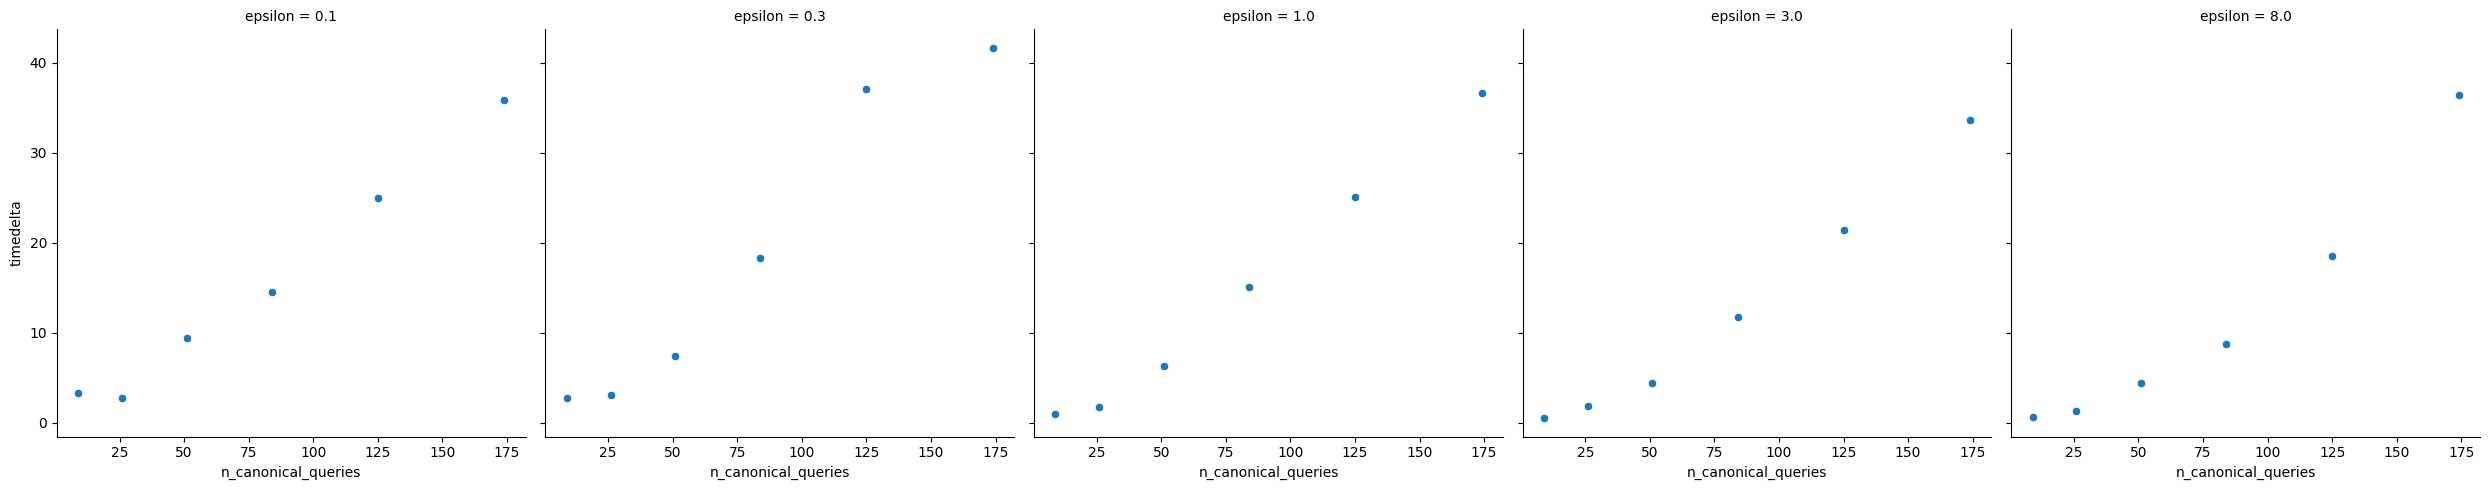

In [34]:
LA_rows = linear_regression_results[linear_regression_results['task'] == 'Laplace approximation']
sns.relplot(
    data=LA_rows,
    x="n_canonical_queries", y="timedelta", col="epsilon",
)

plt.plot()

In [82]:
n = 30
x = MCMC_rows['n_canonical_queries'].to_numpy()
y = MCMC_rows['epsilon'].to_numpy()
Z = MCMC_rows['timedelta'].to_numpy()

degree = 3

A = []

for i in range(n):
    A.append([])
    for xd in range(degree+1):
        for yd in range(degree+1-xd):
            A[i].append((x[i]**xd)*(y[i]**yd))            

c,_,_,_ = linalg.lstsq(A,Z)

j = 0

for xd in range(0,degree+1):
    for yd in range(0,degree+1-xd):
        print(f" + ({c[j]}) x^ {xd} y^ {yd}")
        j += 1

 + (3272.8513081068527) x^ 0 y^ 0
 + (-15513.186768508473) x^ 0 y^ 1
 + (8154.979581595167) x^ 0 y^ 2
 + (-793.8353478725403) x^ 0 y^ 3
 + (31.977790561866836) x^ 1 y^ 0
 + (-101.97188005090729) x^ 1 y^ 1
 + (16.230331543572248) x^ 1 y^ 2
 + (0.1682323506139619) x^ 2 y^ 0
 + (-0.33833026643051833) x^ 2 y^ 1
 + (0.00762688551925114) x^ 3 y^ 0


In [98]:
def runtime_estimation_function(n_canonical_queries, epsilon):
    result = 3272.8513081068527 + 
    -15513.186768508473*epsilon + 
    8154.979581595167*(epsilon**2) + 
    -793.8353478725403*(epsilon**3) + 
    31.977790561866836*n_canonical_queries + 
    -101.97188005090729*n_canonical_queries*epsilon + 
    16.230331543572248*n_canonical_queries*(epsilon**2) + 
    0.1682323506139619*(n_canonical_queries**2) + 
    -0.33833026643051833*(n_canonical_queries**2)*epsilon + 
    0.00762688551925114*(n_canonical_queries**3)
    return 3272.8513081068527 + -15513.186768508473*epsilon + 8154.979581595167*(epsilon**2) + -793.8353478725403*(epsilon**3) + 31.977790561866836*n_canonical_queries + -101.97188005090729*n_canonical_queries*epsilon + 16.230331543572248*n_canonical_queries*(epsilon**2) + 0.1682323506139619*(n_canonical_queries**2) + -0.33833026643051833*(n_canonical_queries**2)*epsilon + 0.00762688551925114*(n_canonical_queries**3)

SyntaxError: invalid syntax (2170418632.py, line 2)

In [84]:
MCMC_rows['runtime_estimation'] = MCMC_rows.apply(lambda x: runtime_estimation_function(x['n_canonical_queries'], x['epsilon']), axis=1)

/tmp/ipykernel_1482055/3541534656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MCMC_rows['runtime_estimation'] = MCMC_rows.apply(lambda x: runtime_estimation_function(x['n_canonical_queries'], x['epsilon']), axis=1)


In [85]:
MCMC_rows

,experiment_id,start,stop,timedelta,task,dataset_name,query,epsilon,delta,MCMC_algo,laplace_approximation,laplace_approximation_algorithm,query_str,query_list,missing_query,discretization,n_canonical_queries,junction_tree_width,suff_stat_dim,runtime_estimation
5,V4ULPDFD,1.383229e+06,1.383261e+06,31.263832,MCMC,dummy_5x2,NaN,0.3,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,3.0,"(9,)",-632.002113
12,ZQM99RBQ,1.383268e+06,1.383294e+06,25.969453,MCMC,dummy_5x2,NaN,3.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,1.0,"(9,)",7480.741618
19,JEFBHZF0,1.383266e+06,1.383295e+06,29.504196,MCMC,dummy_5x2,NaN,1.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,2.0,"(9,)",-5371.282980
26,VUZSN0ID,1.383276e+06,1.383302e+06,26.128632,MCMC,dummy_5x2,NaN,0.1,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,3.0,"(9,)",2016.221089
33,JALY4KLB,1.383258e+06,1.383322e+06,64.414908,MCMC,dummy_5x3,NaN,8.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,26.0,3.0,"(26,)",-311.019408
40,GVTRS6VY,1.383277e+06,1.383338e+06,61.182982,MCMC,dummy_5x3,NaN,1.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,26.0,2.0,"(26,)",-6257.984984
47,AXODXMM1,1.383276e+06,1.383422e+06,146.071826,MCMC,dummy_5x3,NaN,0.1,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,26.0,3.0,"(26,)",2597.708227
54,SEUSX56W,1.383282e+06,1.383506e+06,223.332988,MCMC,dummy_5x4,NaN,8.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,51.0,1.0,"(51,)",2053.804839
61,2GMFCDCA,1.383398e+06,1.383550e+06,152.502921,MCMC,dummy_5x4,NaN,3.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,51.0,2.0,"(51,)",982.739960
68,Q8JHNKI9,1.383282e+06,1.383661e+06,379.142298,MCMC,dummy_5x5,NaN,8.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,84.0,1.0,"(84,)",2667.111804


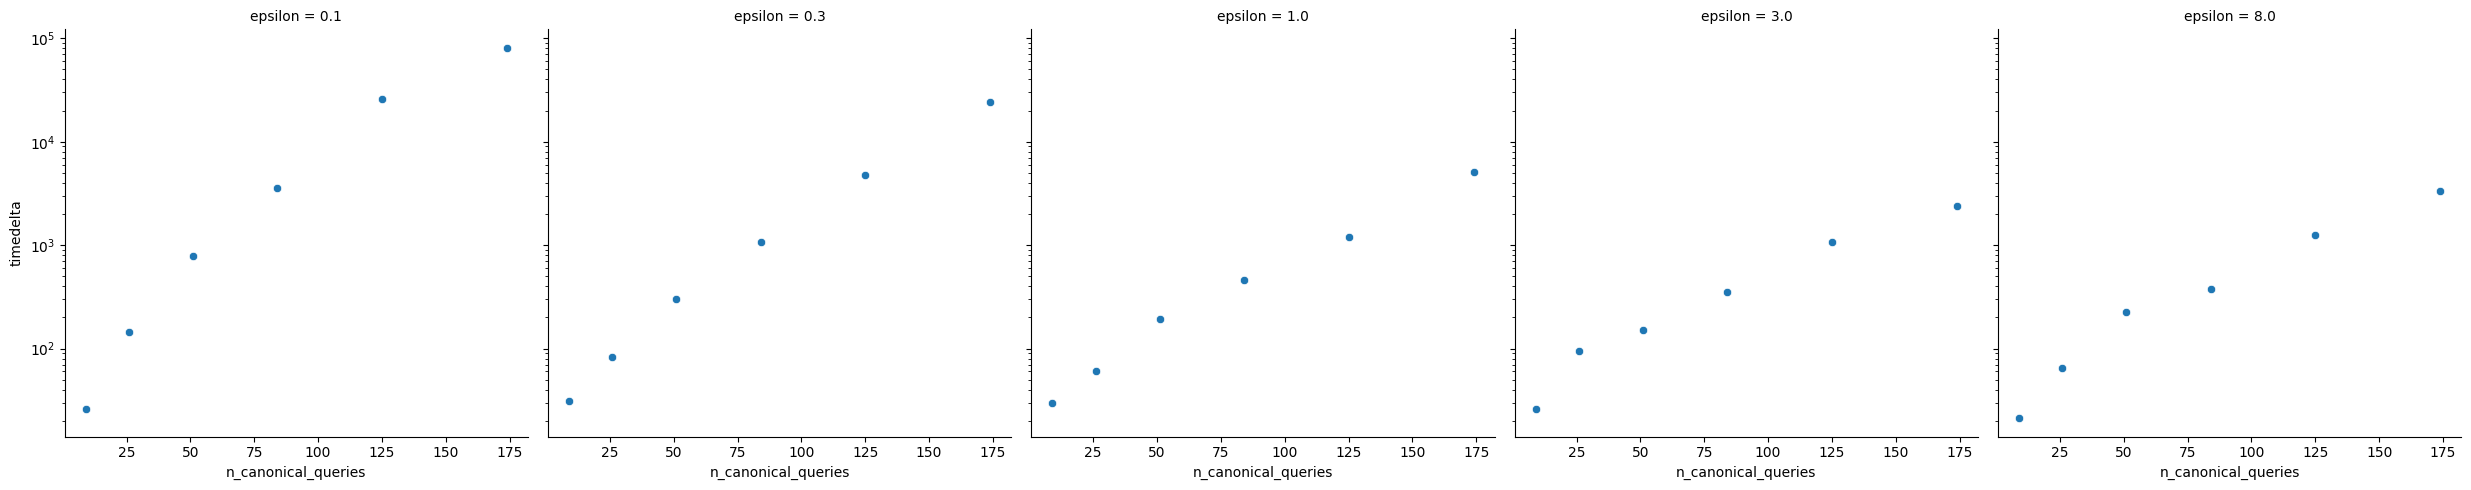

In [102]:
g = sns.relplot(
    data=MCMC_rows,
    x="n_canonical_queries", y="timedelta", col="epsilon",
)

plt.yscale("log")

plt.plot()
g.savefig("linear_regression_plot.png")